In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks')
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks


In [0]:
import pandas as pd
import numpy as np
#import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as sm

In [0]:
data = pd.read_excel('./MMM.xlsx')

In [4]:
data.describe()

,Brand ID,Year,Absolut,Aristocrat,Barton,Belvedere,Burnett,Chopin,Crystal Palac,Finlandia,Fleischmann's,Fris,Gilbey's,Gordon's,Grey Goose,Kamchatka,Ketel One,Level,McCormick,Polar Ice,Popov,Pravda,Seagram's,Skol,Sky,Smirnoff,Stolicnaya,Tanqueray,Three Olives,TotalSales,LagTotalSales,2LagTotalSales,LnSales,LnLSales,Ln2Lsales,LnDiff,diff,IfDom,DollarSales,PriceRerUnit,LagPrice,LnPrice,LnLPrice,Mag,News,Outdoor,Broad,Print,LnMag,LnNews,LnOut,LnBroad,LnPrint,Tier1,Tier2,TotalMinusSales,LagTotalMinusSales,TierSales,OutsideTierSales,LagTierSales,LagOutsideTierSales,Firstintro,Marketshare,LagMktshare,YearID,total ad
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,250.000000,263.000000,250.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,12.596958,2001.695817,0.049430,0.049430,0.049430,0.026616,0.041825,0.026616,0.049430,0.049430,0.045627,0.038023,0.049430,0.049430,0.034221,0.049430,0.030418,0.007605,0.038023,0.011407,0.049430,0.007605,0.003802,0.049430,0.038023,0.049430,0.049430,0.034221,0.022814,1400.414449,1348.330798,1303.072243,6.708256,6.643742,6.572742,0.064010,0.086240,0.612167,113912.877567,83.711114,233.196715,4.218847,4.223238,3280.288213,193.909886,162.041065,275.922053,3474.198095,3.031204,1.547775,1.348791,0.981305,3.344200,0.231939,0.247148,62653.851711,62673.935361,9547.235741,53106.615970,9215.528517,53458.406844,0.015209,0.046972,0.047470,9.695817,7386.359312
std,7.654584,3.639093,0.217177,0.217177,0.217177,0.161265,0.200571,0.161265,0.217177,0.217177,0.209073,0.191616,0.217177,0.217177,0.182142,0.217177,0.172063,0.087038,0.191616,0.106394,0.217177,0.087038,0.061663,0.217177,0.191616,0.217177,0.217177,0.182142,0.149594,1597.958812,1544.115899,1503.205168,1.109225,1.157077,1.221037,0.178957,0.251002,0.488185,166365.752902,57.126081,1721.078091,0.633084,0.793282,6690.513162,549.924069,467.136572,1043.655778,6878.258441,4.147051,2.676316,2.525939,2.433316,4.224179,0.422875,0.432176,1599.768150,1548.346560,2917.310122,2259.775837,2946.563257,2327.430916,0.122617,0.053831,0.054685,3.639093,14280.852135
min,1.000000,1995.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,27.000000,18.000000,3.737670,3.295837,2.890372,-0.563493,-0.396364,0.000000,4690.000000,27.291230,27.291230,3.306566,3.306566,1.000000,0.300000,1.000000,0.600000,2.000000,0.000000,-1.203973,0.000010,-0.510826,0.000010,0.000000,0.000000,55209.000000,55687.000000,846.000000,48358.000000,697.000000,49806.000000,0.000000,0.001468,0.000971,3.000000,6.000000
25%,6.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,485.000000,437.500000,367.000000,6.184149,6.081060,5.905347,-0.015901,-0.015775,0.000000,23691.000000,38.024780,37.762208,3.638237,3.631309,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000010,0.000010,0.000010,0.000000,0.000000,62434.000000,62459.000000,8151.500000,51863.000000,7493.000000,51947.000000,0.000000,0.014762,0.014655,7.000000,6.000000
50%,12.000000,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [5]:
data.columns

Index(['BrandName', 'Brand ID', 'Year', 'Absolut', 'Aristocrat', 'Barton',
       'Belvedere', 'Burnett', 'Chopin', 'Crystal Palac', 'Finlandia',
       'Fleischmann's', 'Fris', 'Gilbey's', 'Gordon's', 'Grey Goose',
       'Kamchatka', 'Ketel One', 'Level', 'McCormick', 'Polar Ice', 'Popov',
       'Pravda', 'Seagram's', 'Skol', 'Sky', 'Smirnoff', 'Stolicnaya',
       'Tanqueray', 'Three Olives', 'TotalSales', 'LagTotalSales',
       '2LagTotalSales', 'LnSales', 'LnLSales', 'Ln2Lsales', 'LnDiff', 'diff',
       'IfDom', 'DollarSales', 'PriceRerUnit', 'LagPrice', 'LnPrice',
       'LnLPrice', 'Mag', 'News', 'Outdoor', 'Broad', 'Print', 'LnMag',
       'LnNews', 'LnOut', 'LnBroad', 'LnPrint', 'Tier1', 'Tier2',
       'TotalMinusSales', 'LagTotalMinusSales', 'TierSales',
       'OutsideTierSales', 'LagTierSales', 'LagOutsideTierSales', 'Firstintro',
       'Marketshare', 'LagMktshare', 'YearID', 'total ad'],
      dtype='object')

In [6]:
data['BrandName'].unique()

array(['Absolut', 'Aristocrat', 'Barton', 'Belvedere', 'Burnett',
       'Chopin', 'Crystal Palac', 'Finlandia', "Fleischmann's", 'Fris',
       "Gilbey's", "Gordon's", 'Grey Goose', 'Kamchatka', 'Ketel One',
       'Level', 'McCormick', 'Polar Ice', 'Popov', 'Pravda', "Seagram's",
       'Skol', 'Sky', 'Smirnoff', 'Stolicnaya', 'Tanqueray',
       'Three Olives'], dtype=object)

In [8]:
len(data['BrandName'].unique())

27

There are 27 brands of vodka manufacturing companies.

For Market Mix Modelling, let's choose a brand and analyse the impact of Price on sales. For instance, let's choose 'Absolut' as the brand for our analysis.

In [0]:
Absolut = data[data['BrandName'] == 'Absolut']

In [10]:
Absolut

,BrandName,Brand ID,Year,Absolut,Aristocrat,Barton,Belvedere,Burnett,Chopin,Crystal Palac,Finlandia,Fleischmann's,Fris,Gilbey's,Gordon's,Grey Goose,Kamchatka,Ketel One,Level,McCormick,Polar Ice,Popov,Pravda,Seagram's,Skol,Sky,Smirnoff,Stolicnaya,Tanqueray,Three Olives,TotalSales,LagTotalSales,2LagTotalSales,LnSales,LnLSales,Ln2Lsales,LnDiff,diff,IfDom,DollarSales,PriceRerUnit,LagPrice,LnPrice,LnLPrice,Mag,News,Outdoor,Broad,Print,LnMag,LnNews,LnOut,LnBroad,LnPrint,Tier1,Tier2,TotalMinusSales,LagTotalMinusSales,TierSales,OutsideTierSales,LagTierSales,LagOutsideTierSales,Firstintro,Marketshare,LagMktshare,YearID,total ad
0,Absolut,15,1995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3000,2905,2790,8.006368,7.974189,7.933797,0.032179,0.032702,0,352040.0,117.3467,109.2943,4.765132,4.694044,25713.7,291.4,332.7,1.0,26005.1,0.000000,0.000000,0.000010,0.000010,10.166050,1,0,60840,60903,1080,59760,1035,59868,0,0.133923,0.124241,3,52343.9
1,Absolut,15,1996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3340,3000,2905,8.113726,8.006368,7.974189,0.107358,0.113333,0,370072.0,110.8000,117.3467,4.707727,4.765133,25658.0,177.6,625.0,1.0,25835.6,10.152610,5.325933,6.384520,0.000010,10.159510,1,0,60532,60840,1255,59277,1080,59760,0,0.142007,0.133923,4,52297.2
2,Absolut,15,1997,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3440,3340,3000,8.143227,8.113726,8.006368,0.029501,0.029940,0,381152.0,110.8000,110.8000,4.707727,4.707727,27013.9,201.7,515.7,1.0,27215.6,10.204110,5.306781,6.245525,0.000010,10.211550,1,0,60464,60532,1532,58932,1255,59277,0,0.146758,0.142007,5,54947.9
3,Absolut,15,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3630,3440,3340,8.196988,8.143227,8.113726,0.053761,0.055233,0,419737.0,115.6300,110.8000,4.750396,4.707727,27617.0,308.2,1420.4,161.9,27925.2,10.226190,5.730749,7.258694,5.086979,10.237280,1,0,60306,60464,1730,58576,1532,58932,0,0.146106,0.146758,6,57432.7
4,Absolut,15,1999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4050,3630,3440,8.306472,8.196988,8.143227,0.109484,0.115702,0,468302.0,115.6301,115.6300,4.750397,4.750395,30605.3,258.1,1416.8,70.3,30863.4,10.328930,5.553347,7.256156,4.252772,10.337330,1,0,59918,60306,2118,57800,1730,58576,0,0.161284,0.146106,7,63213.9
5,Absolut,15,2000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4605,4050,3630,8.434898,8.306472,8.196988,0.128427,0.137037,0,560025.0,121.6124,115.6301,4.800839,4.750396,33971.3,533.4,1336.7,143.1,34504.7,10.433270,6.279272,7.197959,4.963544,10.448850,1,0,59395,59918,2549,56846,2118,57800,0,0.173368,0.161284,8,70489.2
6,Absolut,15,2001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4379,4605,4050,8.384576,8.434898,8.306472,-0.050322,-0.049077,0,556550.0,127.0952,121.6124,4.844937,4.800839,28559.8,231.3,1999.0,134.2,28791.1,10.259760,5.443716,7.600402,4.899331,10.267820,1,0,59653,59395,3358,56295,2549,56846,0,0.157546,0.173368,9,59715.4
7,Absolut,15,2002,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4475,4379,4605,8.406261,8.384576,8.434898,0.021686,0.021923,0,594000.0,132.7374,127.0952,4.888373,4.844936,30387.3,424.8,523.1,1.0,30812.1,10.321780,6.051619,6.259773,0.000010,10.335660,1,0,59589,59653,4197,55392,3358,56295,0,0.150425,0.157546,10,62148.3
8,Absolut,15,2003,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4488,4475,4379,8.409163,8.406261,8.384576,0.002902,0.002905,0,620000.0,138.1462,132.7374,4.928312,4.888373,29275.0,958.6,2819.4,315.5,30233.6,10.284490,6.865474,7.944279,5.754158,10.316710,1,0,59608,59589,4939,54669,4197,55392,0,0.139245,0.150425,11,63602.1
9,Absolut,15,2004,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4640,4488,4475,8.442470,8.409163,8.406261,0.033306,0.033868,0,658880.0,142.0000,138.1462,4.955827,4.928313,31208.5,5.9,2185.1,2202.4,31214.4,10.348450,1.774952,7.689417,7.697303,10.348630,1,0,59488,59608,5582,53906,4939,54669,0,0.134353,0.139245,12,66816.3


In [0]:
Pr_Absolut = Absolut[['LnSales','LnPrice']]

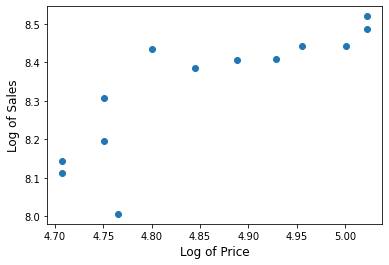

In [12]:
plt.scatter(Pr_Absolut['LnPrice'],Pr_Absolut['LnSales'])
plt.xlabel('Log of Price',fontsize=12)
plt.ylabel('Log of Sales',fontsize=12)
plt.show()

We can check that there is a linear trend.

In [0]:
result = sm.ols(formula = 'LnSales ~ LnPrice',data = Pr_Absolut).fit()

In [15]:
result.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LnSales   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     24.26
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           0.000453
Time:                        02:23:37   Log-Likelihood:                 13.282
No. Observations:                  13   AIC:                            -22.56
Df Residuals:                      11   BIC:                            -21.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8367      1.116      2.543      0.027       0.381       5.292
LnPrice        1.1310      0.230      4.926      0.000       0.626       1.636
==============================================================================
Omnibus:                        4.580   Durbin-Watson:                   0.653
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.653
Skew:                          -0.553   Prob(JB):                        0.438
Kurtosis:                       4.352   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared value is 0.688. THe coefficient of price tells that for every unit increase in price, there is 1.13 times increase in sales.

Now let's try with the advertising and price column.

In [0]:
Ad_Absolut = Absolut[['LnSales','LnMag','LnNews','LnOut','LnBroad','LnPrint','LnPrice']]

In [0]:
result_ad = sm.ols('LnSales ~ LnMag + LnNews + LnOut + LnBroad + LnPrint + LnPrice',data=Ad_Absolut).fit()

In [18]:
result_ad.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LnSales   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     13.96
Date:                Tue, 31 Mar 2020   Prob (F-statistic):            0.00270
Time:                        02:25:23   Log-Likelihood:                 23.293
No. Observations:                  13   AIC:                            -32.59
Df Residuals:                       6   BIC:                            -28.63
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6613      1.697      0.979      0.365      -2.491       5.814
LnMag          0.0891      0.062      1.438      0.200      -0.062       0.241
LnNews         0.0131      0.012      1.132      0.301      -0.015       0.042
LnOut         -0.1219      0.106     -1.152      0.293      -0.381       0.137
LnBroad        0.0328      0.023      1.413      0.207      -0.024       0.090
LnPrint        0.1101      0.081      1.366      0.221      -0.087       0.307
LnPrice        1.0968      0.253      4.332      0.005       0.477       1.716
==============================================================================
Omnibus:                        0.747   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.610
Skew:                           0.043   Prob(JB):                        0.737
Kurtosis:                       1.942   Cond. No.                     1.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared value has increased! But, here the p-values of some variables are high which can be accounted due to interaction effect and some other factors.

We need to check the interation effect between variables "LnBroad" and "LnPrint"

In [0]:
result_inter = sm.ols('LnSales ~ LnMag + LnNews + LnOut + LnBroad * LnPrint + LnPrice',data=Ad_Absolut).fit()

In [20]:
result_inter.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LnSales   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     24.84
Date:                Tue, 31 Mar 2020   Prob (F-statistic):            0.00135
Time:                        02:27:42   Log-Likelihood:                 28.963
No. Observations:                  13   AIC:                            -41.93
Df Residuals:                       5   BIC:                            -37.41
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.2128      3.931     -2.089      0.091     -18.317       1.892
LnMag              -0.0110      0.058     -0.190      0.857      -0.160       0.138
LnNews             -0.0056      0.011     -0.515      0.628      -0.034       0.022
LnOut               0.0426      0.097      0.437      0.680      -0.208       0.293
LnBroad             1.6251      0.604      2.692      0.043       0.073       3.177
LnPrint             1.2719      0.444      2.864      0.035       0.130       2.413
LnBroad:LnPrint    -0.1586      0.060     -2.638      0.046      -0.313      -0.004
LnPrice             0.6901      0.236      2.919      0.033       0.082       1.298
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                0.165
Skew:                          -0.211   Prob(JB):                        0.921
Kurtosis:                       3.355   Cond. No.                     1.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can check that there is a significant interation.